# 1. Import Libraries and Load Cleaned Dataset

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

df = pd.read_csv("/Users/mac/Documents/Ecommerce_Project/cleaned_ecommerce_sales.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          100000 non-null  int64  
 1   product_category  100000 non-null  object 
 2   product_price     100000 non-null  float64
 3   quantity          100000 non-null  int64  
 4   order_date        100000 non-null  object 
 5   year              100000 non-null  int64  
 6   month             100000 non-null  int64  
 7   year_month        100000 non-null  object 
 8   region            100000 non-null  object 
 9   payment_method    100000 non-null  object 
 10  is_returned       100000 non-null  int64  
 11  customer_rating   100000 non-null  float64
 12  revenue           100000 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 9.9+ MB


,order_id,product_price,quantity,year,month,is_returned,customer_rating,revenue
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,250.962504,3.085480,2024.00276,6.535780,0.060600,3.500493,734.148001
std,28867.657797,141.743414,1.438706,0.81807,3.448431,0.238596,0.867731,571.191290
min,1.000000,4.518000,1.000000,2023.00000,1.000000,0.000000,2.000000,4.260000
25%,25000.750000,128.387500,2.000000,2023.00000,4.000000,0.000000,2.800000,274.110000
50%,50000.500000,251.430000,3.000000,2024.00000,7.000000,0.000000,3.500000,585.550000
75%,75000.250000,372.270000,4.000000,2025.00000,10.000000,0.000000,4.200000,1089.855000
max,100000.000000,500.000000,6.000000,2025.00000,12.000000,1.000000,5.000000,2699.140000


# 2. Overall Sales Trend Analysis

## 2.1 Yearly Sales Trend

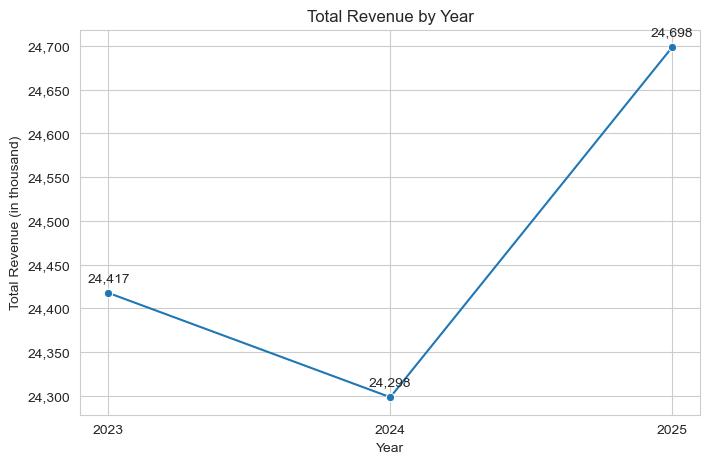

In [466]:
yearly_sales = (
    df.groupby("year")["revenue"]
    .sum()
    .reset_index()
)

yearly_sales["revenue_thousand"] = yearly_sales["revenue"] / 1_000

plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_sales, x="year", y="revenue_thousand", marker="o")

plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue (in thousand)")
plt.xticks(yearly_sales["year"])

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

for x, y in zip(yearly_sales["year"], yearly_sales["revenue_thousand"]):
    plt.text(x, y+10, f"{int(y):,}", ha="center", va="bottom")
    
plt.show()

## 2.2 Monthly Sales Trend

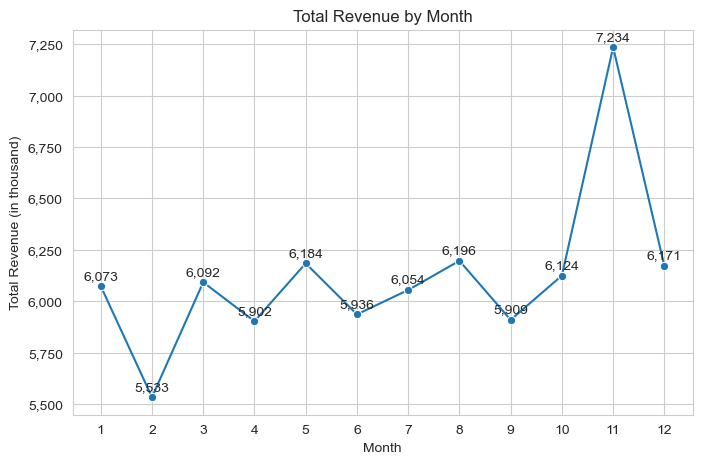

In [458]:
monthly_sales = (
    df.groupby("month")["revenue"]
    .sum()
    .reset_index()
)

monthly_sales["revenue_thousand"] = monthly_sales["revenue"] / 1_000

plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_sales, x="month", y="revenue_thousand", marker="o")

plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue (in thousand)")
plt.xticks(range(1, 13))

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

for x, y in zip(monthly_sales["month"], monthly_sales["revenue_thousand"]):
    plt.text(x, y+20, f"{int(y):,}", ha="center", va="bottom")
    
plt.show()

## 2.3 Year-Month Sales Trend

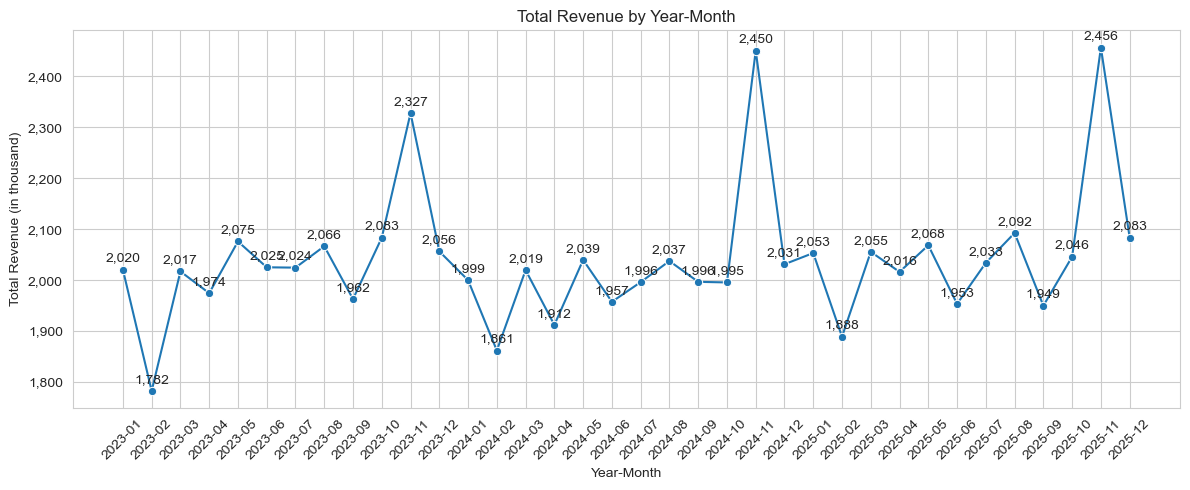

In [459]:
year_month_sales = (
    df.groupby("year_month")["revenue"]
    .sum()
    .reset_index()
)

year_month_sales["revenue_thousand"] = year_month_sales["revenue"] / 1_000

plt.figure(figsize=(12, 5))
sns.lineplot(data=year_month_sales, x="year_month", y="revenue_thousand", marker="o")

plt.title("Total Revenue by Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (in thousand)")

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

for x, y in zip(year_month_sales["year_month"], year_month_sales["revenue_thousand"]):
    plt.text(x, y+10, f"{int(y):,}", ha="center", va="bottom")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Sales Comparison by Region and Product Category

## 3.1 Sales by Region

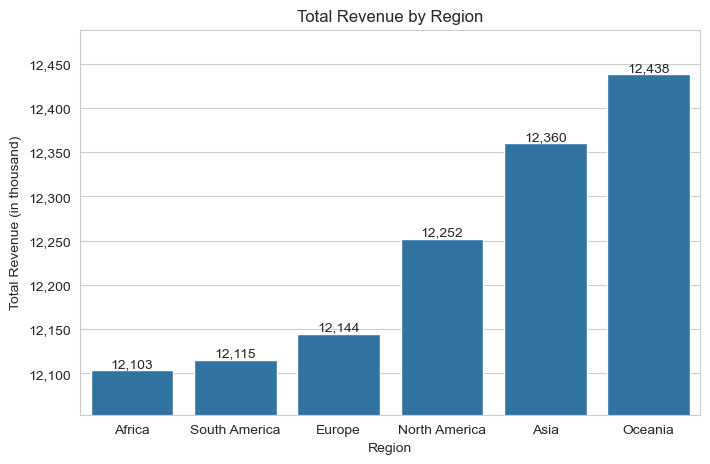

In [460]:
region_sales = (
    df.groupby("region")["revenue"]
    .sum()
    .sort_values(ascending=True)
    .reset_index()
)

region_sales["revenue_thousand"] = region_sales["revenue"] / 1_000

plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x="region", y="revenue_thousand")


plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (in thousand)")
plt.ylim(region_sales["revenue_thousand"].min()-50, region_sales["revenue_thousand"].max()+50)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

for i, row in region_sales.iterrows():
    plt.text(i, row["revenue_thousand"], f"{int(row['revenue_thousand']):,}", 
             ha="center", va="bottom")

plt.show()

## 3.2 Sales by Product Category

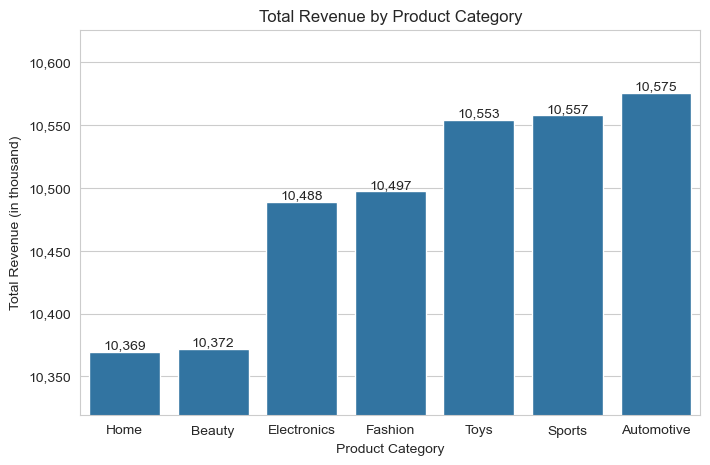

In [461]:
category_sales = (
    df.groupby("product_category")["revenue"]
    .sum()
    .sort_values(ascending=True)
    .reset_index()
)

category_sales["revenue_thousand"] = category_sales["revenue"] / 1_000

plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x="product_category", y="revenue_thousand")

plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (in thousand)")
plt.ylim(category_sales["revenue_thousand"].min()-50, category_sales["revenue_thousand"].max()+50)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

for i, row in category_sales.iterrows():
    plt.text(i, row["revenue_thousand"], f"{int(row['revenue_thousand']):,}", 
             ha="center", va="bottom")

plt.show()

# 4. Return Rate Analysis by Region and Product Category

## 4.1 Return Rate by Region

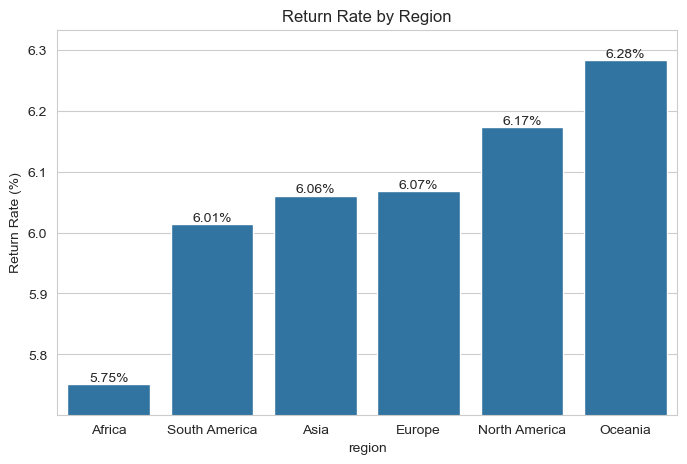

In [462]:
region_return_rate = (
    df.groupby("region")["is_returned"]
    .mean()
    .reset_index()
    .sort_values(by="is_returned", ascending=True) 
)

region_return_rate["return_rate_pct"] = region_return_rate["is_returned"] * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=region_return_rate, x="region", y="return_rate_pct")

plt.title("Return Rate by Region")
plt.ylabel("Return Rate (%)")
plt.ylim(region_return_rate["return_rate_pct"].min()-0.05, region_return_rate["return_rate_pct"].max()+0.05)

for i, rate in enumerate(region_return_rate["return_rate_pct"]):
    plt.text(i, rate, f"{rate:.2f}%", ha="center", va="bottom")
    
plt.show()

## 4.2 Return Rate by Product Category

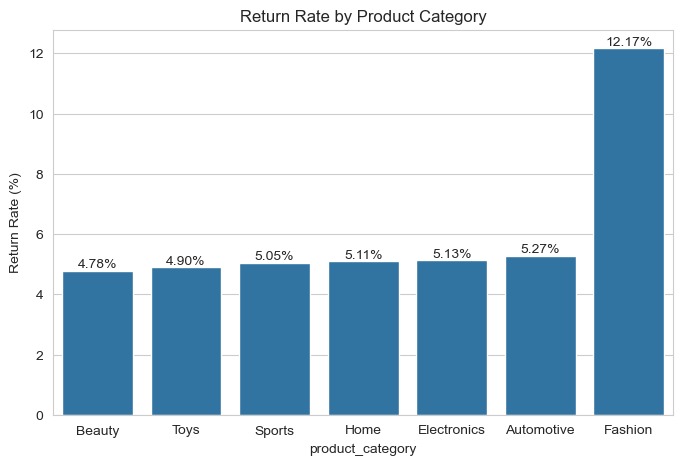

In [463]:
category_return_rate = (
    df.groupby("product_category")["is_returned"]
    .mean()
    .reset_index()
    .sort_values(by="is_returned", ascending=True) 
)

category_return_rate["return_rate_pct"] = category_return_rate["is_returned"] * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=category_return_rate, x="product_category", y="return_rate_pct")

plt.title("Return Rate by Product Category")
plt.ylabel("Return Rate (%)")

for i, rate in enumerate(category_return_rate["return_rate_pct"]):
    plt.text(i, rate, f"{rate:.2f}%", ha="center", va="bottom")

plt.show()

# 5. Customer Rating Analysis by Region and Product Category 

## 5.1 Average Customer Rating by Region

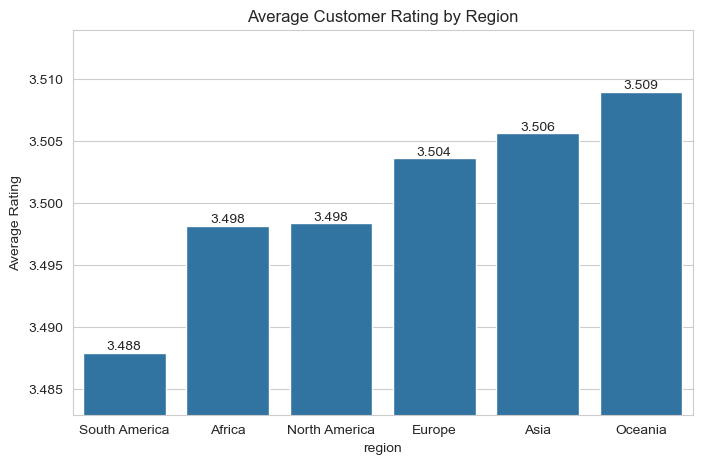

In [464]:
region_rating = (
    df.groupby("region")["customer_rating"]
    .mean()
    .reset_index()
    .sort_values(by="customer_rating", ascending=True)
)

plt.figure(figsize=(8, 5))
sns.barplot(data=region_rating, x="region", y="customer_rating")

plt.title("Average Customer Rating by Region")
plt.ylabel("Average Rating")
plt.ylim(region_rating["customer_rating"].min()-0.005, region_rating["customer_rating"].max()+0.005)

for i, rating in enumerate(region_rating["customer_rating"]):
    plt.text(i, rating, f"{rating:.3f}", ha="center", va="bottom")
    
plt.show()

## 5.2 Average Customer Rating by Product Category

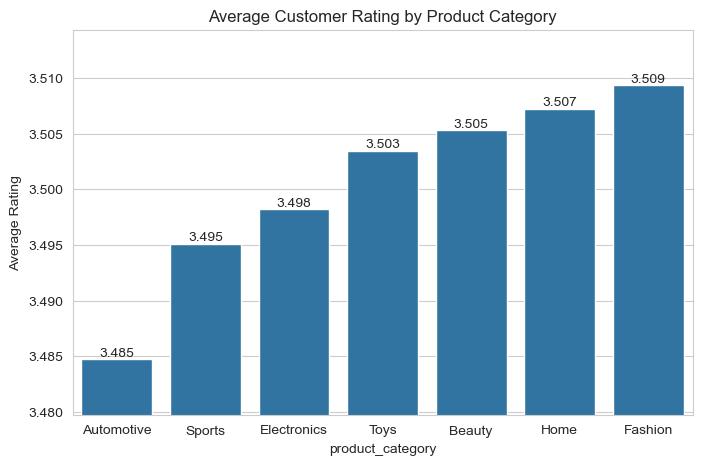

In [465]:
category_rating = (
    df.groupby("product_category")["customer_rating"]
    .mean()
    .reset_index()
    .sort_values(by="customer_rating", ascending=True) 
)

plt.figure(figsize=(8, 5))
sns.barplot(data=category_rating, x="product_category", y="customer_rating")

plt.title("Average Customer Rating by Product Category")
plt.ylabel("Average Rating")
plt.ylim(category_rating["customer_rating"].min()-0.005, category_rating["customer_rating"].max()+0.005)

for i, rating in enumerate(category_rating["customer_rating"]):
    plt.text(i, rating, f"{rating:.3f}", ha="center", va="bottom")

plt.show()